In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load Dataset

In [2]:
df = pd.read_csv("dataset/Gun_Price_Prediction.csv")

# Explore Data

#### Display first 5 rows

In [3]:
df.head() 

,Age (in years),Weight (in kg),Muzzle Velocity (m/s),Max Range (m),Price (in $)
0,5,3.0,800,600,1500
1,4,3.2,810,620,1800
2,3,3.1,820,630,1600
3,6,3.3,830,640,1700
4,2,2.9,790,590,1400


#### Display dataset info

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age (in years)         100 non-null    int64  
 1   Weight (in kg)         100 non-null    float64
 2   Muzzle Velocity (m/s)  100 non-null    int64  
 3   Max Range (m)          100 non-null    int64  
 4   Price (in $)           100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


#### Summary statistics

In [5]:
df.describe() 

,Age (in years),Weight (in kg),Muzzle Velocity (m/s),Max Range (m),Price (in $)
count,100.00000,100.000000,100.00000,100.000000,100.000000
mean,12.02000,5.656000,895.60000,693.700000,2376.000000
std,6.60881,1.980374,67.95453,64.340555,616.706796
min,2.00000,2.900000,790.00000,590.000000,1400.000000
25%,6.00000,3.700000,830.00000,640.000000,1850.000000
50%,11.50000,5.500000,890.00000,687.500000,2200.000000
75%,18.00000,7.400000,951.25000,750.000000,2850.000000
max,25.00000,9.600000,1030.00000,820.000000,3750.000000


#### Check for missing values

In [6]:
df.isnull().sum() 

Age (in years)           0
Weight (in kg)           0
Muzzle Velocity (m/s)    0
Max Range (m)            0
Price (in $)             0
dtype: int64

# Feature Engineering

#### Define Features and Target

In [7]:
features = ["Age (in years)", "Weight (in kg)", "Muzzle Velocity (m/s)", "Max Range (m)"] 
target = "Price (in $)" 
features_and_target = ["Age (in years)", "Weight (in kg)", "Muzzle Velocity (m/s)", "Max Range (m)", "Price (in $)"] 

#### Calculate additional metrics

In [8]:
df["Price-to-Weight Ratio"] = df["Price (in $)"] / df["Weight (in kg)"]
df["Performance Index"] = (df["Muzzle Velocity (m/s)"] * df["Max Range (m)"]) / (df["Weight (in kg)"] * df["Age (in years)"])

#### Define Age Category

In [9]:
def categorize_age(age):
    if age <= 2:
        return "New"
    elif age <= 7:
        return "Moderate"
    else:
        return "Old"

df["Age Category"] = df["Age (in years)"].apply(categorize_age)

#### Define Weight Category

In [10]:
def categorize_weight(weight):
    if weight <= 3.5:
        return "Light"
    elif weight <= 5:
        return "Medium"
    else:
        return "Heavy"

df["Weight Category"] = df["Weight (in kg)"].apply(categorize_weight)

# Data Visualization

#### Price Trends by Age

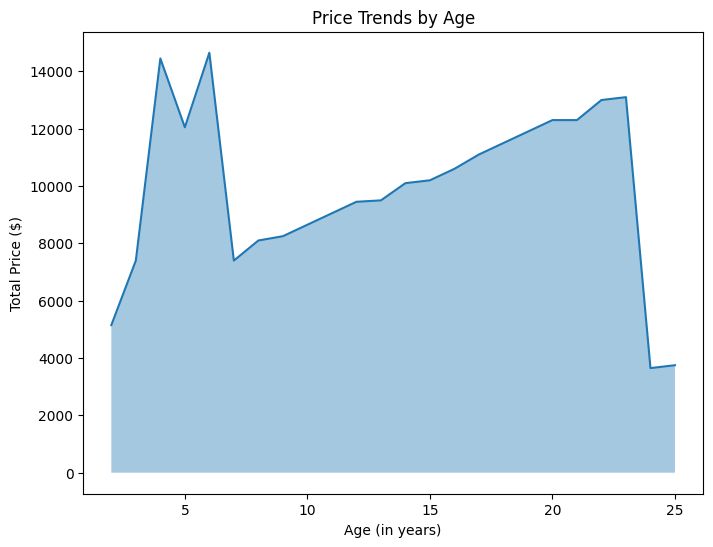

In [11]:
age_price_sum = df.groupby("Age (in years)")["Price (in $)"].sum()
plt.figure(figsize=(8, 6))
plt.fill_between(age_price_sum.index, age_price_sum.values, alpha=0.4)
plt.plot(age_price_sum.index, age_price_sum.values)
plt.xlabel("Age (in years)")
plt.ylabel("Total Price ($)")
plt.title("Price Trends by Age")
plt.show()

#### Price Trends by Weight

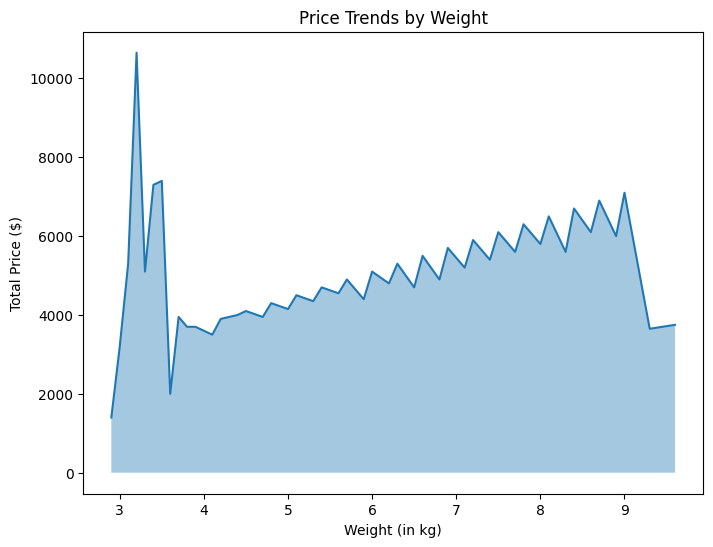

In [12]:
weight_price_sum = df.groupby("Weight (in kg)")["Price (in $)"].sum()
plt.figure(figsize=(8, 6))
plt.fill_between(weight_price_sum.index, weight_price_sum.values, alpha=0.4)
plt.plot(weight_price_sum.index, weight_price_sum.values)
plt.xlabel("Weight (in kg)")
plt.ylabel("Total Price ($)")
plt.title("Price Trends by Weight")
plt.show()

#### Price Trends by Age Category

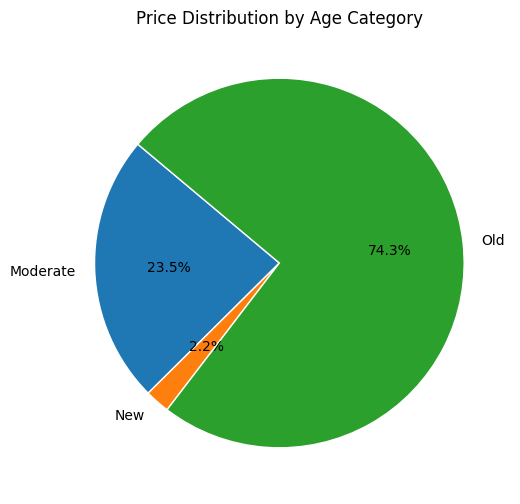

In [13]:
age_category_price = df.groupby("Age Category")["Price (in $)"].sum()
plt.figure(figsize=(8, 6))
plt.pie(age_category_price, labels=age_category_price.index, autopct="%1.1f%%", startangle=140, wedgeprops={"edgecolor": "white"})
plt.title("Price Distribution by Age Category")
plt.show()

#### Price Trends by Weight Category

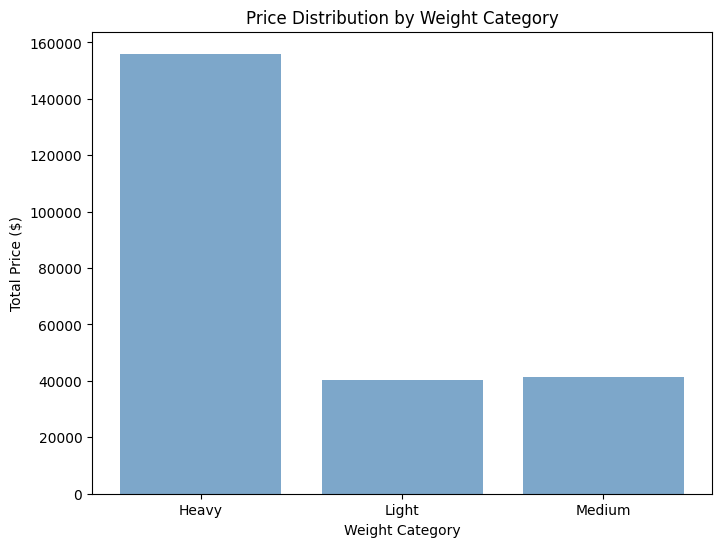

In [14]:
weight_category_price = df.groupby("Weight Category")["Price (in $)"].sum()
plt.figure(figsize=(8, 6))
plt.bar(weight_category_price.index, weight_category_price.values, color="steelblue", alpha=0.7)
plt.xlabel("Weight Category")
plt.ylabel("Total Price ($)")
plt.title("Price Distribution by Weight Category")
plt.show()

#### Muzzle Velocity vs Max Range

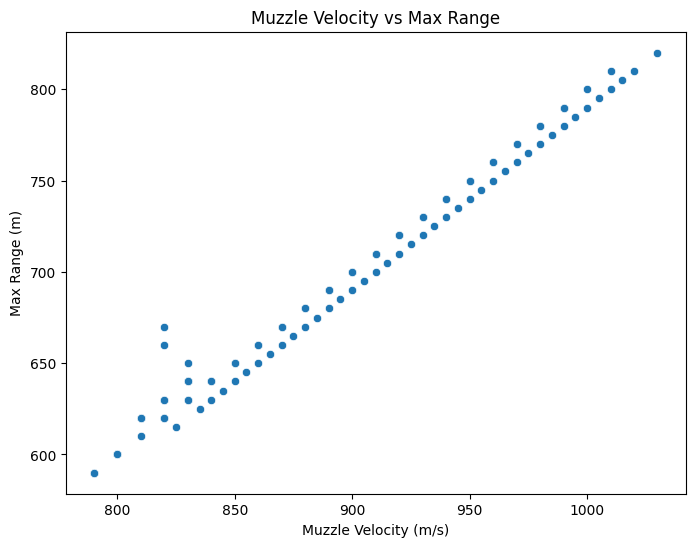

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Muzzle Velocity (m/s)", y="Max Range (m)", data=df)
plt.title("Muzzle Velocity vs Max Range")
plt.show()

#### Price Distribution

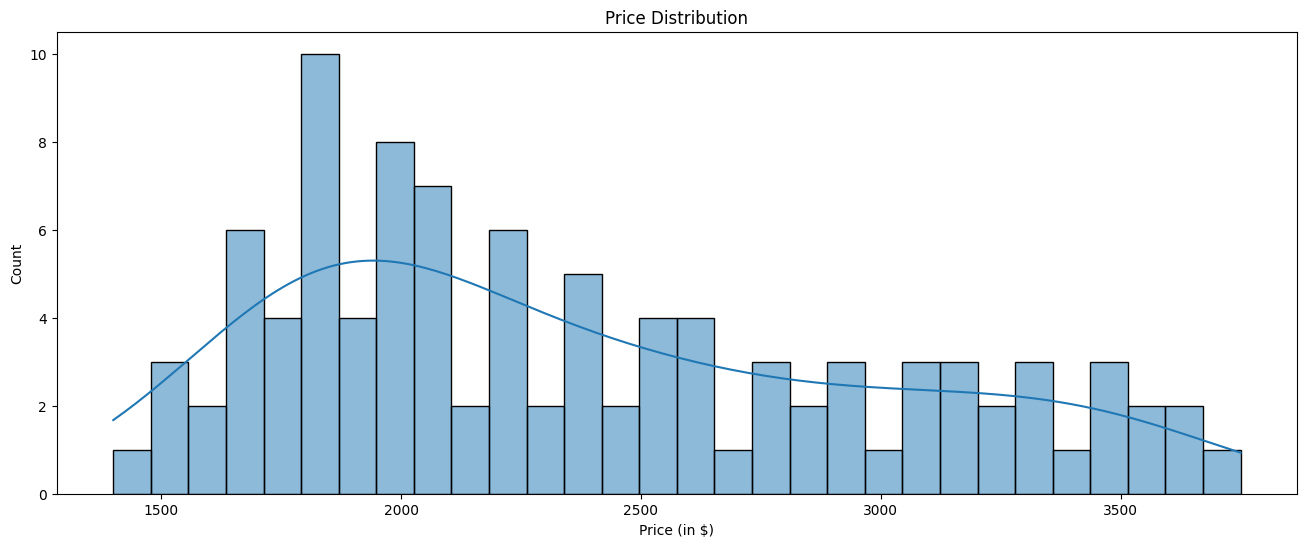

In [16]:
plt.figure(figsize=(16,6))
sns.histplot(df["Price (in $)"], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

In [17]:
#### Price vs Performance Index

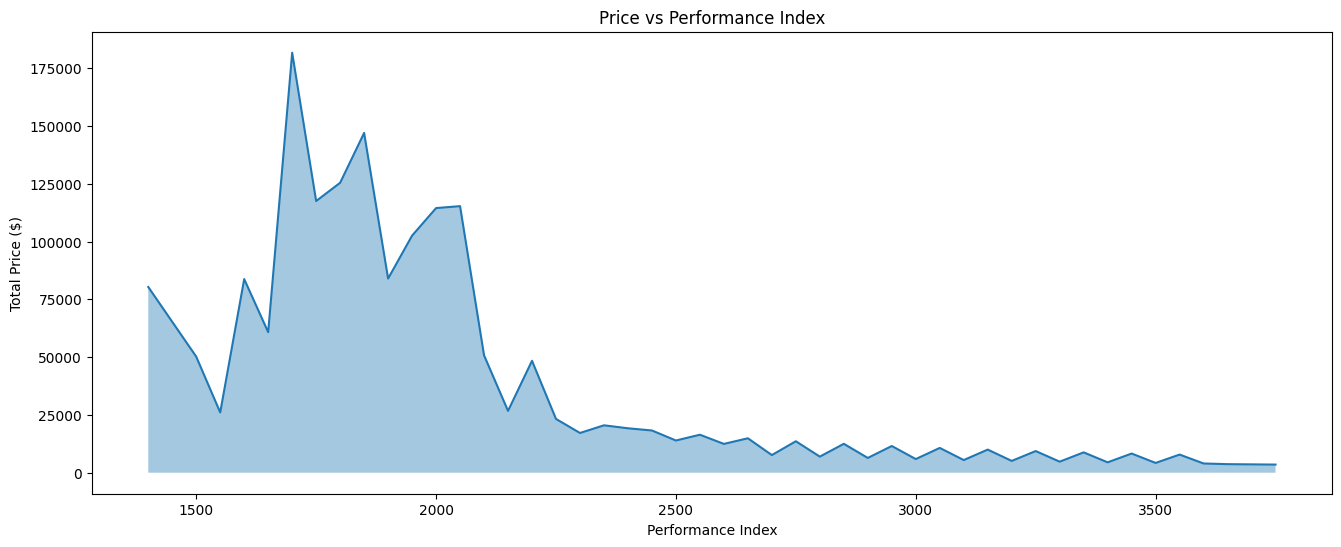

In [18]:
performance_index_sum = df.groupby("Price (in $)")["Performance Index"].sum()
plt.figure(figsize=(16, 6))
plt.fill_between(performance_index_sum.index, performance_index_sum.values, alpha=0.4)
plt.plot(performance_index_sum.index, performance_index_sum.values)
plt.xlabel("Performance Index")
plt.ylabel("Total Price ($)")
plt.title("Price vs Performance Index")
plt.show()

#### Outlier Detection

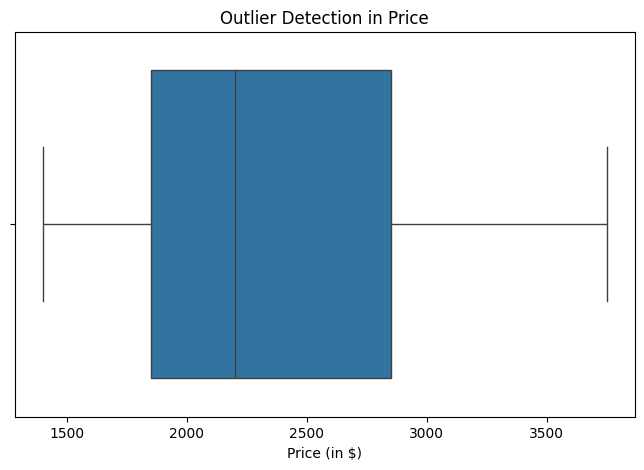

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Price (in $)"])
plt.title("Outlier Detection in Price")
plt.show()

#### Relationships Between Attributes

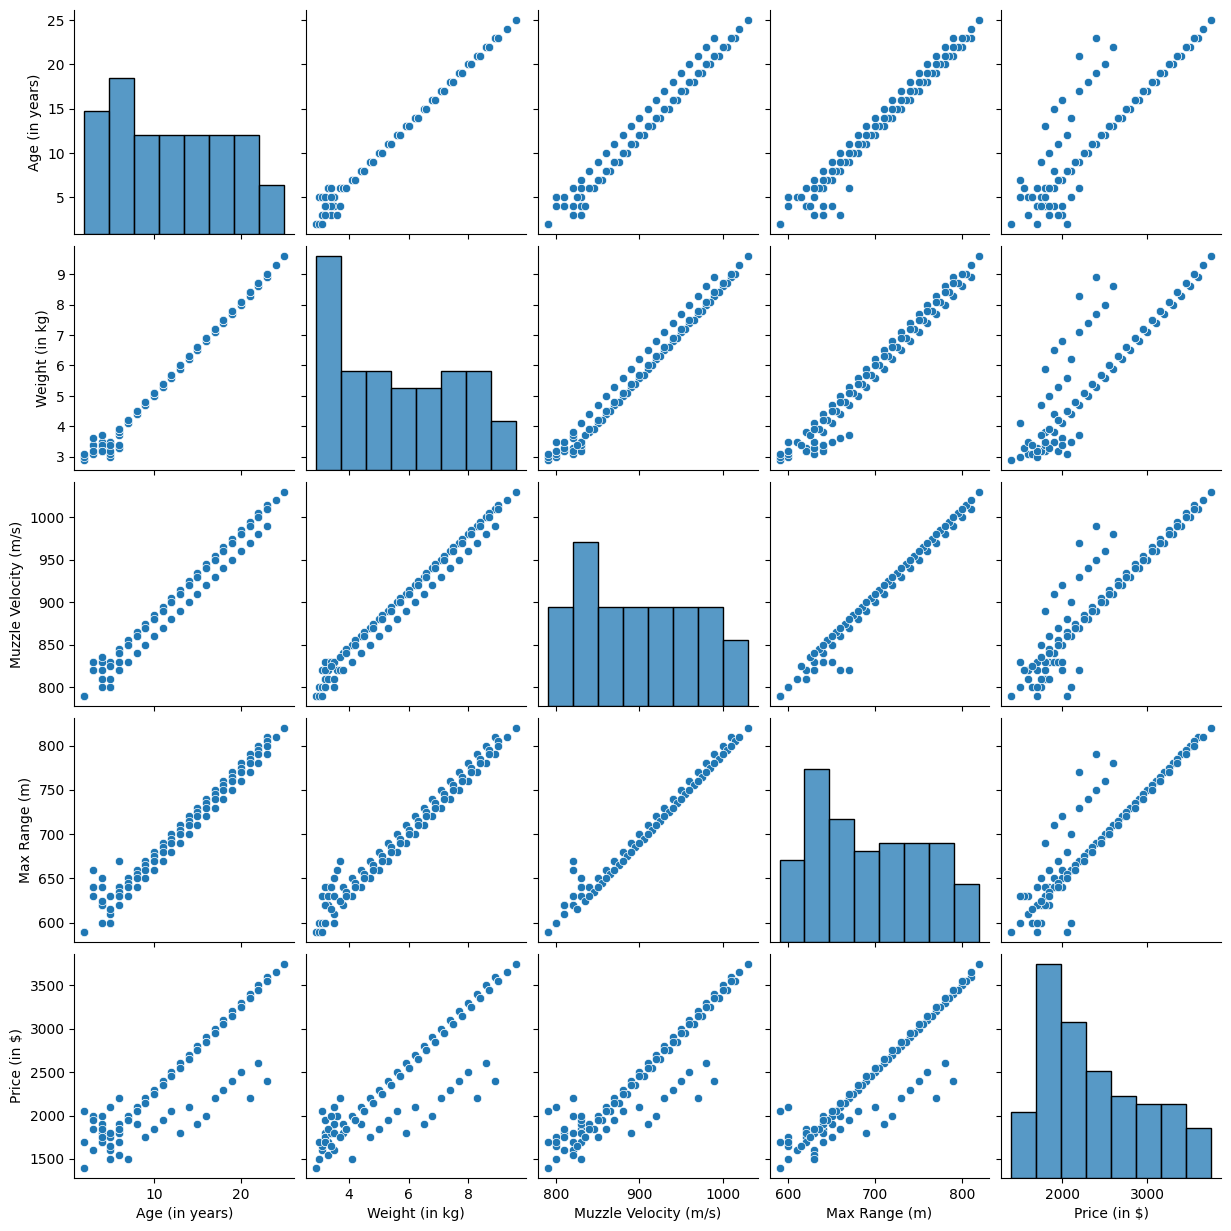

In [20]:
sns.pairplot(df[features_and_target])
plt.show()

# Actual vs Predicted Prices Prediction

#### Check VIF (Variance Inflation Factor)

In [21]:
X = df.select_dtypes(include=["number"]).drop(columns=["Price-to-Weight Ratio", "Performance Index"])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,Age (in years),557.516193
1,Weight (in kg),1518.232814
2,Muzzle Velocity (m/s),6249.696302
3,Max Range (m),6840.608046
4,Price (in $),85.033791


#### Prepare to Regression Analyses

In [22]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate model
def evaluate_model(y_true, y_pred, model_name):
    """Evaluate and prints performance metrics of a regression model"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}\n")

#### Ridge Regression

In [23]:
# Ridge Regression
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate model
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Ridge Regression Performance:
MAE: 151.98, MSE: 47275.94, RMSE: 217.43, R2: 0.88



#### Linear Regression

Linear Regression Performance:
MAE: 151.17, MSE: 46642.75, RMSE: 215.97, R2: 0.88

                            OLS Regression Results                            
Dep. Variable:           Price (in $)   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     170.1
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.09e-42
Time:                        22:30:51   Log-Likelihood:                -678.85
No. Observations:                 100   AIC:                             1368.
Df Residuals:                      95   BIC:                             1381.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

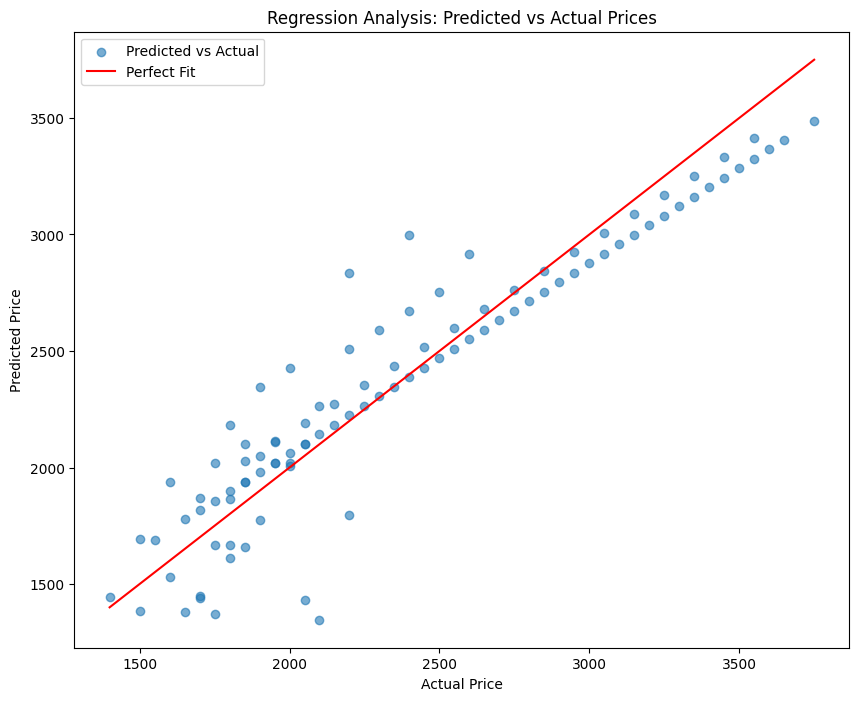

In [24]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluate model
evaluate_model(y_test, y_pred, "Linear Regression")

# OLS Regression 
X_sm = sm.add_constant(X) # Intercept
model = sm.OLS(y, X_sm).fit()
summary = model.summary()
print(summary)

plt.figure(figsize=(10, 8))
y_pred_sm = model.predict(X_sm)
plt.scatter(y, y_pred_sm, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression Analysis: Predicted vs Actual Prices')
plt.legend()
plt.show()

#### Correlation Matrix Heatmap

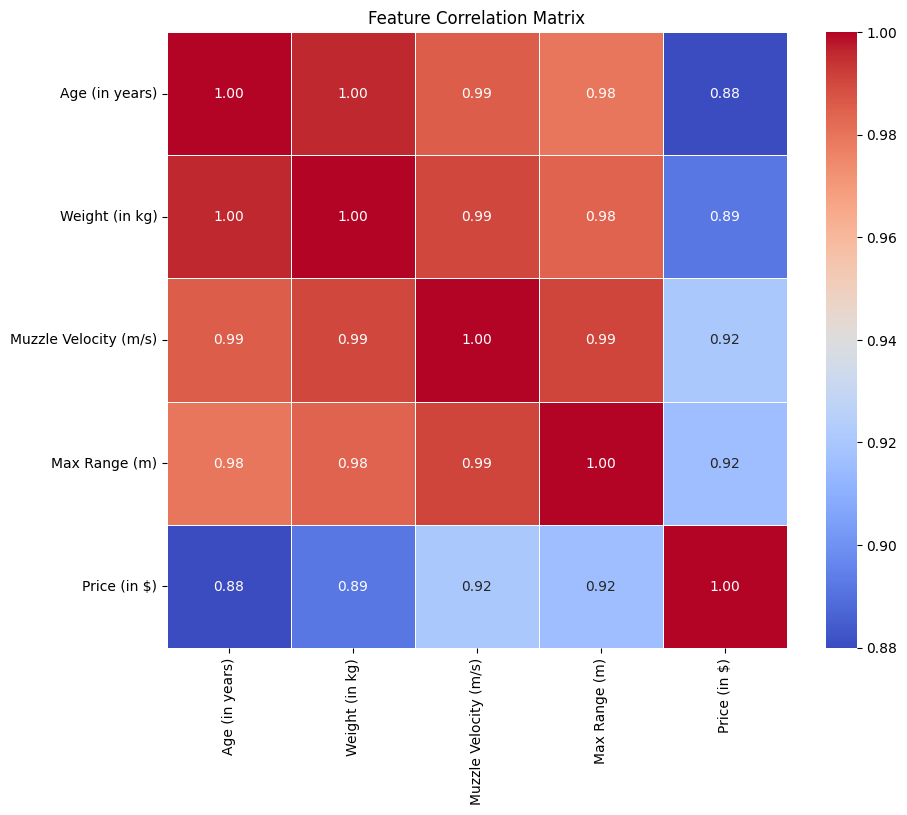

In [25]:
plt.figure(figsize=(10,8))
numeric_data = df[features_and_target]
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()